# Predicting Compressive Strength of Concrete

# Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

The concrete compressive strength is a highly nonlinear function of age and ingredients .These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Name -- Data Type -- Measurement -- Description
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input
Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in
a m3 mixture -- Input Variable

Fly Ash (component 3) --
quantitative -- kg in a m3 mixture -- Input Variable

Water
(component 4) -- quantitative -- kg in a m3 mixture -- Input
Variable

Superplasticizer (component 5) -- quantitative -- kg in a
m3 mixture -- Input Variable

Coarse Aggregate (component 6) --
quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate
(component 7) -- quantitative -- kg in a m3 mixture -- Input
Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output
Variable



In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
#Lets now load our data set
df = pd.read_csv("Concrete_compressive_strength.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water,Superplasticizer (component 5)(kg in a m^3 mixture),Coarse_agg,Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

We have only numeric values in our dataset

Looking at the dataset, we have 1030 rows and 9 features.

The name of the columns are a bit lengthy lets shorten them as per our requirement

In [4]:
df = df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"Cement","Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Slag","Fly Ash (component 3)(kg in a m^3 mixture)":"Ash","Water (component 4)(kg in a m^3 mixture)":"Water","Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplastic","Coarse Aggregate (component 6)(kg in a m^3 mixture)":"Coarse_agg","Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_agg","Age (day)":"Age","Concrete compressive strength(MPa, megapascals)":"Strength"})
df.head()

,Cement,Slag,Ash,Water,Superplastic,Coarse_agg,Fine_agg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Lets check for the datatype is our dataset

In [5]:
df.dtypes

Cement          float64
Slag            float64
Ash             float64
Water           float64
Superplastic    float64
Coarse_agg      float64
Fine_agg        float64
Age               int64
Strength        float64
dtype: object

Checking for null values

In [6]:
df.isna().sum()

Cement          0
Slag            0
Ash             0
Water           0
Superplastic    0
Coarse_agg      0
Fine_agg        0
Age             0
Strength        0
dtype: int64

Statistical summary of our dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse_agg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine_agg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Exploratory Data analysis

In [8]:
from scipy import stats

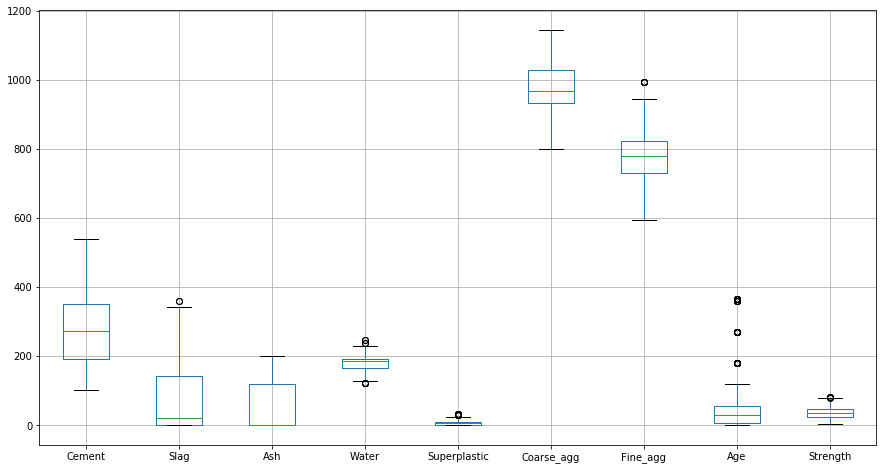

In [9]:
df.boxplot(figsize=(15,8))

Here we have an outlier in Slag, Water, Superplastic, Fine_agg, Age.

In [12]:
print(df['Slag'].quantile(0.10))
print(df['Slag'].quantile(0.90))

0.0
192.0


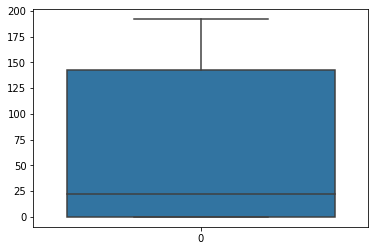

In [13]:
df["Slag"] = np.where(df["Slag"] <0.0, 0.0,df['Slag'])
df["Slag"] = np.where(df["Slag"] >192.0, 192.0,df['Slag'])
sns.boxplot(data=df.Slag)

In [16]:
print(df['Water'].quantile(0.10))
print(df['Water'].quantile(0.90))

154.6
203.5


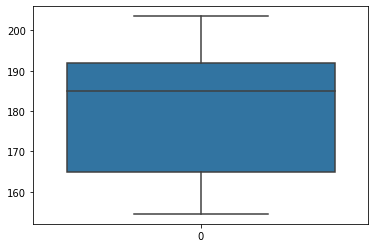

In [17]:
#removing outliers
df["Water"] = np.where(df["Water"] <154.5, 154.5,df['Water'])
df["Water"] = np.where(df["Water"] >203.5, 203.5,df['Water'])
sns.boxplot(data=df.Water)

In [19]:
print(df['Superplastic'].quantile(0.10))
print(df['Superplastic'].quantile(0.90))

0.0
12.21


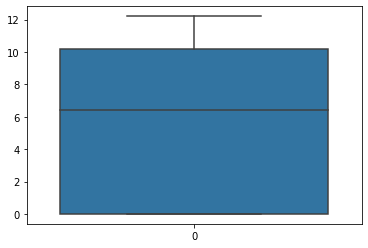

In [20]:
#removing outliers
df["Superplastic"] = np.where(df["Superplastic"] <0.0, 0.0,df['Superplastic'])
df["Superplastic"] = np.where(df["Superplastic"] >12.21, 12.21,df['Superplastic'])
sns.boxplot(data=df.Superplastic)

In [24]:
print(df['Fine_agg'].quantile(0.10))
print(df['Fine_agg'].quantile(0.90))

664.0699999999999
880.7600000000001


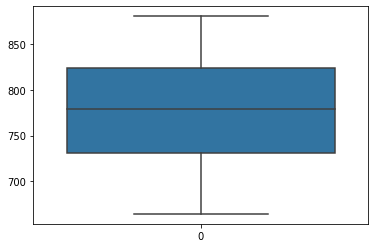

In [25]:
#removing outliers
df["Fine_agg"] = np.where(df["Fine_agg"] <664.0699999999999, 664.0699999999999,df['Fine_agg'])
df["Fine_agg"] = np.where(df["Fine_agg"] >880.76, 880.76,df['Fine_agg'])
sns.boxplot(data=df.Fine_agg)

In [27]:
print(df['Age'].quantile(0.10))
print(df['Age'].quantile(0.90))

3.0
100.0


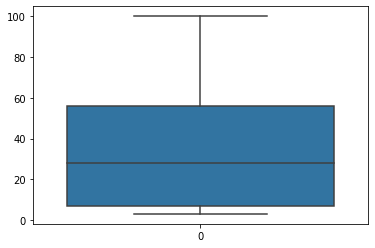

In [28]:
#removing outliers
df["Age"] = np.where(df["Age"] <3.0, 3.0,df['Age'])
df["Age"] = np.where(df["Age"] >100.0, 100.0,df['Age'])
sns.boxplot(data=df.Age)

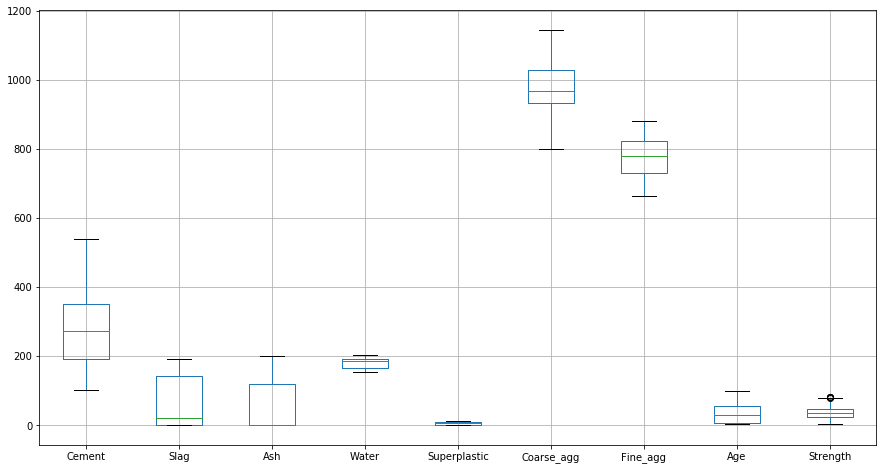

In [34]:
df.boxplot(figsize=(15,8)) #All outliers are removed

In [30]:
df.to_csv("Clean.csv", index = False)